### By Michael Le (UCID: 10104883)

In [1]:
import numpy as np  # Import NumPy
import pandas as pd # Import Pandas
import matplotlib.pyplot as plt # Matplotlib Data Visualization Library
import seaborn as sns # Seaborn Data Visualization Library

from sklearn.model_selection import train_test_split # Import Scikit-Learn train_test_split method
from sklearn.linear_model import LogisticRegression # Import LogisticRegression from sklearn
# Import accuracy_score and confusion_matrix and classification methods from Scikit-Learn metrics
from sklearn.metrics import accuracy_score, confusion_matrix
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler

In [2]:
# Upload the CSV data and convert it to a Pandas DataFrame
df = pd.read_csv('./reduced_version_data_ENEL_645.csv', index_col='Community Name')
df.head()

,Sector,Group Category,Category,Crime Count,Resident Count,Year,Month
Community Name,,,,,,,
WHITEHORN,NORTHEAST,Crime,Street Robbery,1,12019,2019,SEP
FOOTHILLS,EAST,Crime,Theft OF Vehicle,10,317,2019,NOV
ACADIA,SOUTH,Crime,Theft FROM Vehicle,13,10520,2019,SEP
MAHOGANY,SOUTHEAST,Crime,Theft OF Vehicle,1,11784,2019,NOV
LINCOLN PARK,WEST,Crime,Commercial Break & Enter,5,2617,2019,NOV


In [3]:
# View dimensions of the DataFrame
df.shape

(100000, 7)

In [4]:
# Check for null values
df.isnull().sum() 

Sector            0
Group Category    0
Category          0
Crime Count       0
Resident Count    0
Year              0
Month             0
dtype: int64

In [5]:
# Check all unique values for Category in the DataFrame
df['Category'].unique()

array(['Street Robbery', 'Theft OF Vehicle', 'Theft FROM Vehicle',
       'Commercial Break & Enter', 'Social Disorder',
       'Assault (Non-domestic)', 'Residential Break & Enter',
       'Physical Disorder', 'Violence Other (Non-domestic)',
       'Commercial Robbery', '1320.131'], dtype=object)

In [6]:
# Use get_dummies to convert categorical variables into separate indicator columns of 0s and 1s and create a new DataFrame 
# called df_dummies

df_dummies = pd.get_dummies(df, columns=['Sector', 'Group Category', 'Month'])
df_dummies

,Category,Crime Count,Resident Count,Year,Sector_CENTRE,Sector_EAST,Sector_NORTH,Sector_NORTHEAST,Sector_NORTHWEST,Sector_SOUTH,...,Month_DEC,Month_FEB,Month_JAN,Month_JUL,Month_JUN,Month_MAR,Month_MAY,Month_NOV,Month_OCT,Month_SEP
Community Name,,,,,,,,,,,,,,,,,,,,,
WHITEHORN,Street Robbery,1,12019,2019,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
FOOTHILLS,Theft OF Vehicle,10,317,2019,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
ACADIA,Theft FROM Vehicle,13,10520,2019,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
MAHOGANY,Theft OF Vehicle,1,11784,2019,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
LINCOLN PARK,Commercial Break & Enter,5,2617,2019,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WOODBINE,Physical Disorder,2,9131,2013,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
NORTH GLENMORE PARK,Assault (Non-domestic),2,2333,2014,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
HAYSBORO,Physical Disorder,5,6943,2012,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [7]:
# View columns in df_dummies to ensure no columns are missing
list(df_dummies.columns)

['Category',
 'Crime Count',
 'Resident Count',
 'Year',
 'Sector_CENTRE',
 'Sector_EAST',
 'Sector_NORTH',
 'Sector_NORTHEAST',
 'Sector_NORTHWEST',
 'Sector_SOUTH',
 'Sector_SOUTHEAST',
 'Sector_WEST',
 'Group Category_Crime',
 'Group Category_Disorder',
 'Month_APR',
 'Month_AUG',
 'Month_DEC',
 'Month_FEB',
 'Month_JAN',
 'Month_JUL',
 'Month_JUN',
 'Month_MAR',
 'Month_MAY',
 'Month_NOV',
 'Month_OCT',
 'Month_SEP']

In [8]:
# Create Features Matrix X
X = df_dummies[df_dummies.columns[1:]]
# Create output vector y, which is the Crime Count column in df_dummies
y = df_dummies[['Category']]
# Split arrays or matrices into random train and test subsets. Use 70/30 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=39)

In [9]:
pd.set_option('display.max_columns', None) # Set pandas option to view all columns
X.head() # View preview of Features Matrix X

,Crime Count,Resident Count,Year,Sector_CENTRE,Sector_EAST,Sector_NORTH,Sector_NORTHEAST,Sector_NORTHWEST,Sector_SOUTH,Sector_SOUTHEAST,Sector_WEST,Group Category_Crime,Group Category_Disorder,Month_APR,Month_AUG,Month_DEC,Month_FEB,Month_JAN,Month_JUL,Month_JUN,Month_MAR,Month_MAY,Month_NOV,Month_OCT,Month_SEP
Community Name,,,,,,,,,,,,,,,,,,,,,,,,,
WHITEHORN,1,12019,2019,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
FOOTHILLS,10,317,2019,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
ACADIA,13,10520,2019,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
MAHOGANY,1,11784,2019,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
LINCOLN PARK,5,2617,2019,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [10]:
# View dimensions of the Features Matrix X and Output Column y for both training and testing sets
print(f"Dimensions of X_train: {X_train.shape}")
print(f"Dimensions of X_test: {X_test.shape}")
print(f"Dimensions of y_train: {y_train.shape}")
print(f"Dimensions of y_test: {y_test.shape}")

Dimensions of X_train: (70000, 25)
Dimensions of X_test: (30000, 25)
Dimensions of y_train: (70000, 1)
Dimensions of y_test: (30000, 1)


### Algorithm Description
In the code block below, I am instantiating a Logistic Regression model. I have decided to keep all features and apply one hot encoding with the get_dummies() method from pandas for feature engineering, in order to convert categorical data variables like Community Name, Sector, Group Category, and Month so they can be used in my model to improve predictions. I fit the Logistic Regression model to the training data, which is 70% of the total data because this was arbitrarily chosen in the assignment description. Once the model is trained, I use the newly-trained model to predict Category values of the remaining 30% of the total data (the testing data).

Once the prediction is calculated, I calculate and print the scoring accuracy using the true crime count values in the testing set, compared to the predicted values.

In [11]:
# Instantiate Logistic Regression model
model = LogisticRegression(max_iter=3000)
# # Instantiate StandardScaler object
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Train model with training set
model.fit(X_train, y_train.values.ravel())
# Use trained model to predict output values if the test features matrix is used
y_test_pred = model.predict(X_test)

# Use the true labels and predicted labels for the testing set to determine mean squared error
testing_accuracy = accuracy_score(y_test, y_test_pred) 
print(f"Testing Data Accuracy (With 3000 Iterations): {testing_accuracy}")

Testing Data Accuracy (With 3000 Iterations): 0.4854


C:\Users\milec\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Analysis

The performance of my model is evaluated based on an accuracy score between my actual Category output vector and the predicted values, which is equal to 0.4854. This is expected because we are using a real-world dataset from Open Calgary. The data in a Community Crime and Disorder Statistics dataset is likely complex enough that applying a logistic regression model to it will not accurately capture and predict the number of crimes in each community center.

Text(0.5, 1, 'Confusion Matrix - Categories of Actual vs Predicted Crimes using Logistic Regression on the Calgary Crime Dataset')

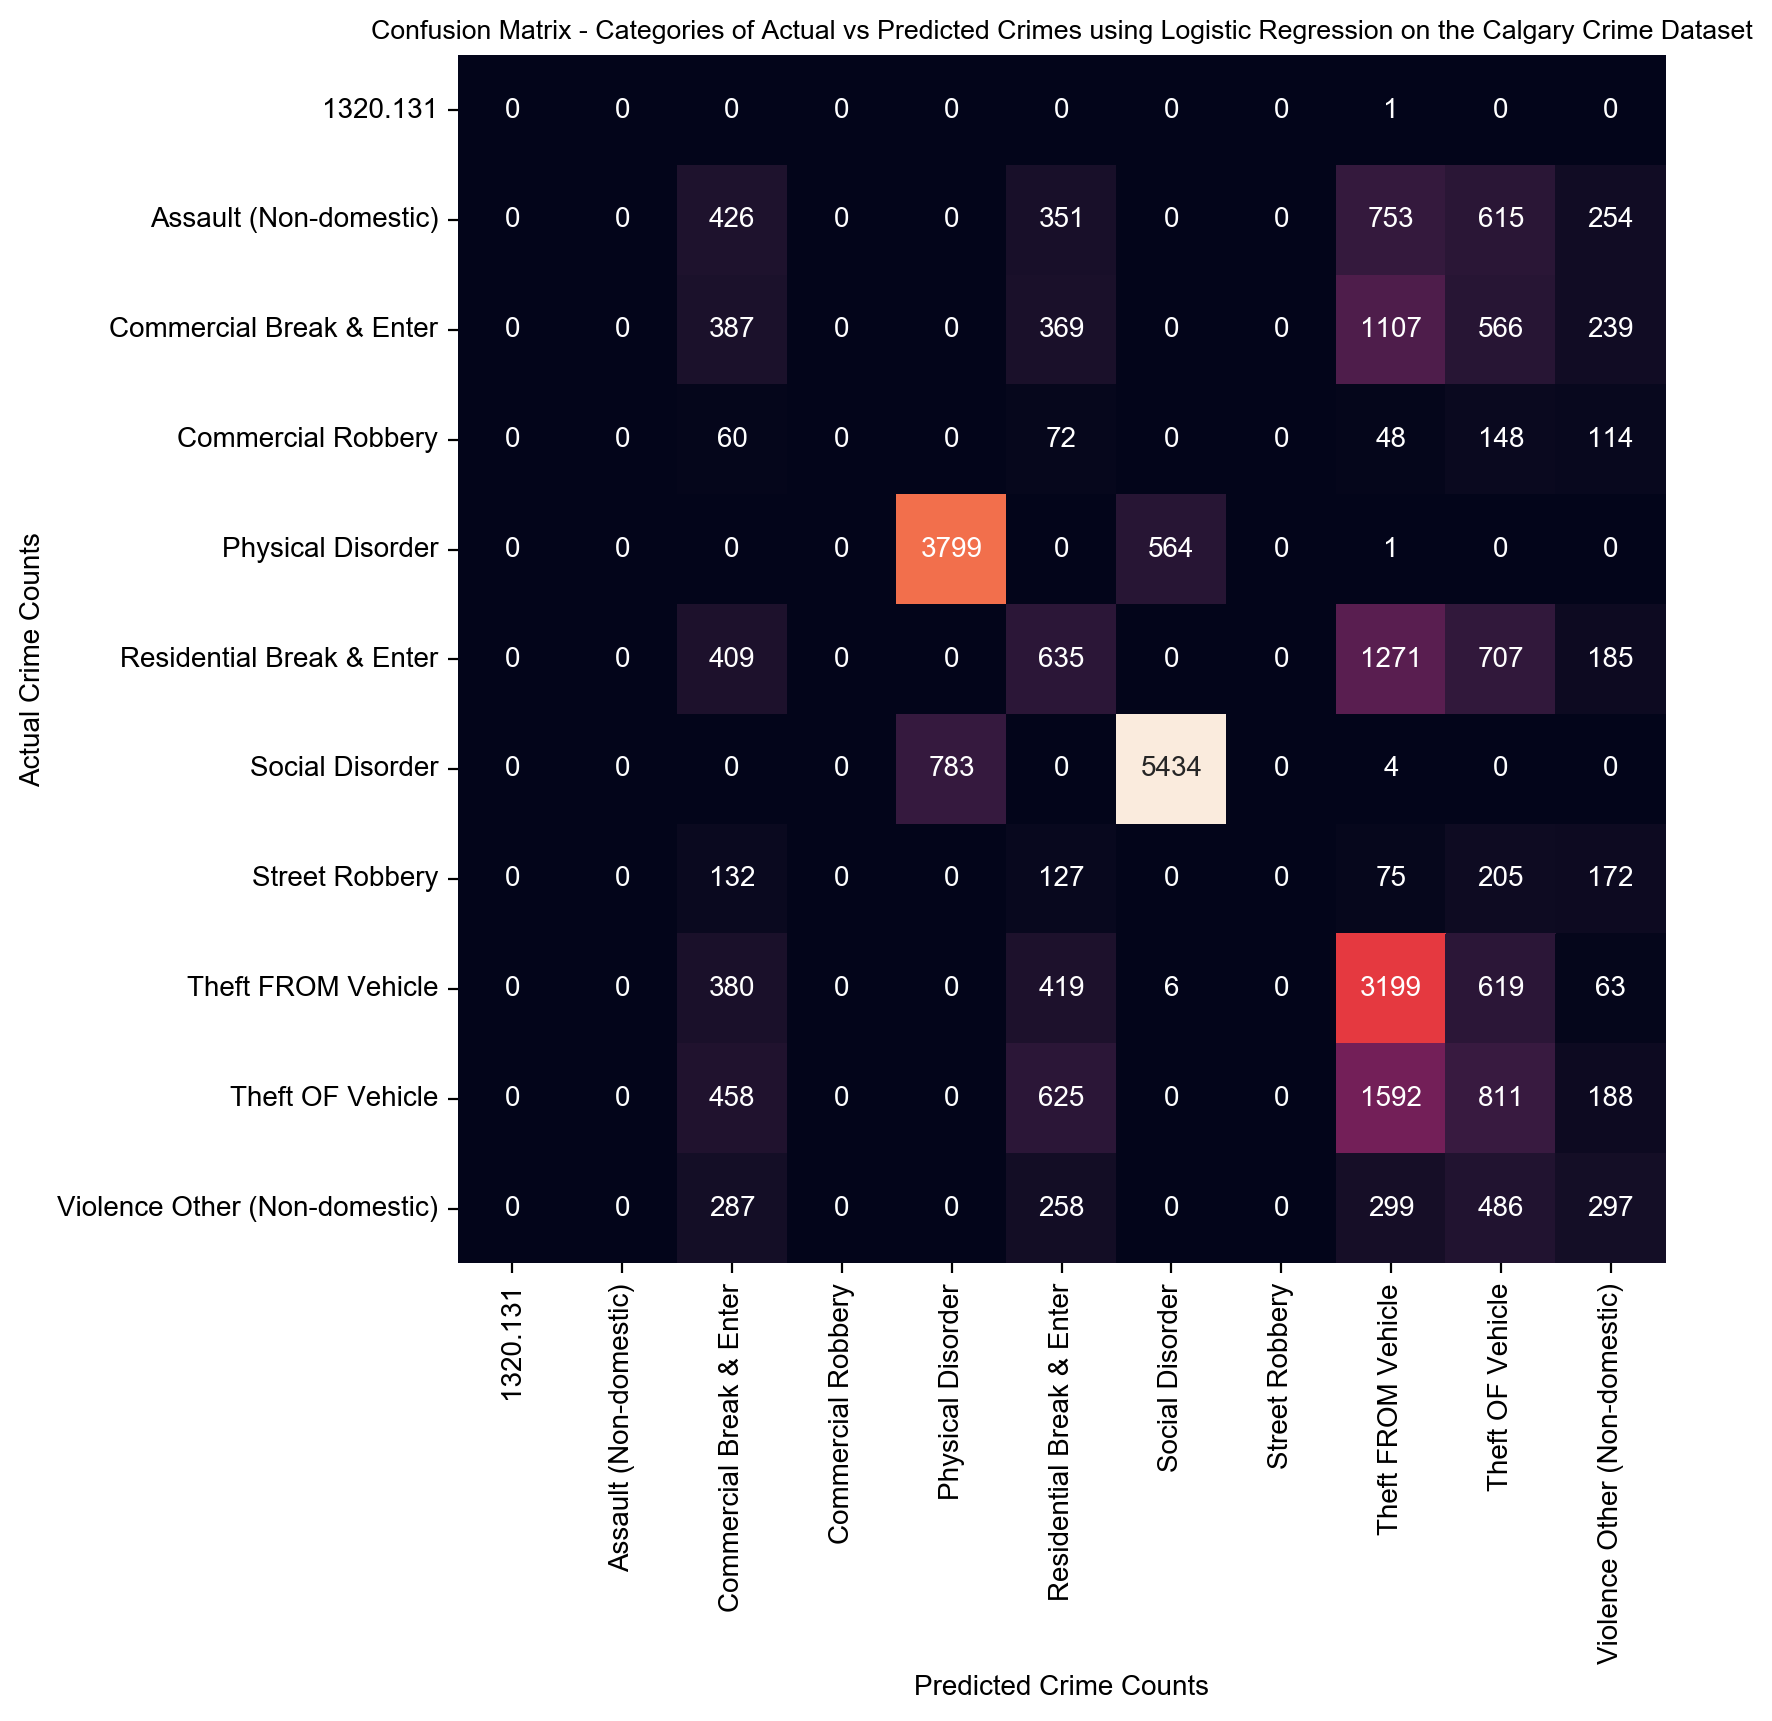

In [12]:
# Create confusion matrix with the actual and predicted labels
confusion_mat = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix with axis labels and titles
plt.figure(figsize=(8, 8), dpi=200)
sns.heatmap(confusion_mat, 
            xticklabels=sorted(df['Category'].unique()),  
            yticklabels=sorted(df['Category'].unique()), 
            square=True, annot=True, cbar=False, 
            fmt='d')
sns.set(font_scale=0.8)
plt.xlabel('Predicted Crime Counts')
plt.ylabel('Actual Crime Counts')
plt.title('Confusion Matrix - Categories of Actual vs Predicted Crimes using Logistic Regression on the Calgary Crime Dataset')

In [13]:
# Check counts of each label in y_test to make sure the correct counts were used in the confusion matrix
print("Actual Counts of Categories")
y_test['Category'].value_counts() 

Actual Counts of Categories


Social Disorder                  6221
Theft FROM Vehicle               4686
Physical Disorder                4364
Theft OF Vehicle                 3674
Residential Break & Enter        3207
Commercial Break & Enter         2668
Assault (Non-domestic)           2399
Violence Other (Non-domestic)    1627
Street Robbery                    711
Commercial Robbery                442
1320.131                            1
Name: Category, dtype: int64

In [14]:
# Check counts of each label in y_test_pred to make sure the correct counts were used in confusion matrix above
print("Predicted Counts of Categories")
pd.DataFrame(y_test_pred, columns=['Category'])['Category'].value_counts()

Predicted Counts of Categories


Theft FROM Vehicle               8350
Social Disorder                  6004
Physical Disorder                4582
Theft OF Vehicle                 4157
Residential Break & Enter        2856
Commercial Break & Enter         2539
Violence Other (Non-domestic)    1512
Name: Category, dtype: int64